# Emilio Flores - DSC 530 - Week 5

## Chapter 5 - Exercise 5.1
In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [97]:
import scipy.stats

mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)

height_min = 177.8 # cm (5'10")
height_max = 185.42 # cm (6'1")

prob_min = dist.cdf(height_min)
prob_max = dist.cdf(height_max)   

percentage_in_range = round(((prob_max - prob_min) * 100), 2)
print(f"Approximately {percentage_in_range}%",
      "of the US male population is between 177.8 cm and 185.42 cm tall")

Approximately 34.27% of the US male population is between 177.8 cm and 185.42 cm tall


## Chapter 5 - Exercise 5.2
To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

scipy.stats.pareto represents a pareto distribution. In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter. So the shortest person is 100 cm and the median is 150.

In [85]:
# libraries and Variables
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.7
xmin =  1 # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
x = np.linspace(1, 5, 1000) # 1000 points between 1 and 5
pdf = dist.pdf(x) # probability density function

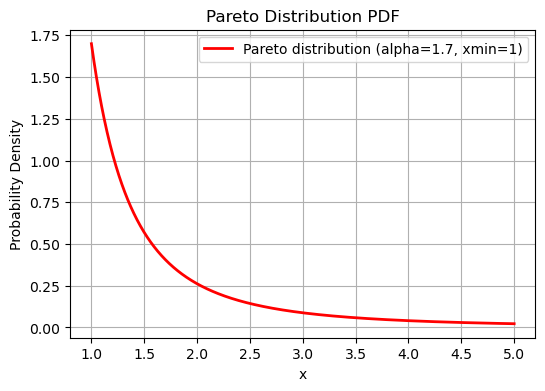

In [87]:
# Plot the distribution

plt.figure(figsize=(6, 4))
plt.plot(x, pdf, 'r-', lw=2, label=f'Pareto distribution (alpha={alpha}, xmin={xmin})')
plt.title('Pareto Distribution PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# What is the mean human height in Pareto world?

avg_height = round(dist.mean(),2)
print(f"The average human height in Pareto world is {avg_height} meters")

The average human height in Pareto world is 2.43 meters


In [73]:
# What fraction of the population is shorter than the mean?

shorter_than_mean = round((dist.cdf(dist.mean())*100),2)
print(f"Approximately {shorter_than_mean}% of the population is shorter than the mean")

Approximately 77.87% of the population is shorter than the mean


In [59]:
# If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km?

onekm_tall = round((1 - dist.cdf(1000)) * 7e9)
print(f"Approximately {onekm_tall} people are taller than 1 km in Pareto world")

Approximately 55603 people are taller than 1 km in Pareto world


In [67]:
# How tall do we expect the tallest person to be?

tallest_person = round(dist.ppf(1 - 1 / 7e9),2)
print(f"The tallest person in Pareto world is {tallest_person} meters tall")

The tallest person in Pareto world is 618349.61 meters tall


## Chapter 6 - Exercise 6.1
Compute the median, mean, skewness and Pearson's skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?

In [145]:
import thinkstats2
import thinkplot
import numpy as np

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def Mean(xs):
    return RawMoment(xs, 1)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [119]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [121]:
import hinc
income_df = hinc.ReadData()
log_sample = InterpolateSample(income_df, log_upper=6.0)
sample = np.power(10, log_sample)


In [131]:
# Median

median = round(Median(sample),2)
print(f"The median of the sample is {median}")

The median of the sample is 51226.45


In [133]:
# Mean

mean = round(Mean(sample),2)
print(f"The mean of the sample is {mean}")

The mean of the sample is 74278.71


In [135]:
# Skewness

skewness = round(Skewness(sample),2)
print(f"The skewness of the sample is {skewness}")

The skewness of the sample is 4.95


In [137]:
# Pearson's skewness

PearsonSkw = round(PearsonMedianSkewness(sample),2)
print(f"The Pearson Skewness of the sample is {PearsonSkw}")

The Pearson Skewness of the sample is 0.74


In [161]:
#  What fraction of households reports a taxable income below the mean? 

cdf = thinkstats2.Cdf(sample)
low_inc = round((cdf.Prob(Mean(sample))*100),2)
print(f"Approximately {low_inc}% of households reports a taxable income",
      "below the mean.")

Approximately 66.0% of households reports a taxable income below the mean.


In [ ]:
# How do the results depend on the assumed upper bound?

''' 
The upper bound determines how skewed the distribution will be. It also affects the mean, which
would affect all of the calcualtions that have been presented so far. 
'''